In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv(r"D:\PNotes\Coding\Project_files\used_cars1.csv")
dataset.head(3)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25


In [3]:
dataset.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## Filling Missing Content
Filling Categorical data : using mode filling

In [5]:
for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

for col in ['Year', 'Owner']:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])
    
for col in ["Present_Price", "Kms_Driven", "Selling_Price"]:
    dataset[col] = dataset[col].fillna(dataset[col].median())
dataset.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [6]:
dataset.shape

(301, 9)

## Encoding

Transforming object type Data into Numeric


### Car Name

In [7]:
Car_Name_le = LabelEncoder()
Car_Name_le.fit_transform(dataset["Car_Name"])

array([90, 93, 68, 96, 92, 95, 68, 91, 68, 68, 62, 68, 68, 76, 73, 76, 76,
       76, 96, 93, 63, 85, 93, 63, 96, 92, 92, 92, 63, 68, 90, 90, 92, 76,
       73, 93, 73,  0, 63, 93, 65, 63, 93, 73, 89, 68, 90, 96, 76, 68, 81,
       81, 86, 81, 86, 71, 77, 71, 78, 81, 71, 77, 81, 81, 81, 80, 86, 81,
       71, 71, 80, 71, 71, 80, 77, 78, 71, 70, 71, 81, 71, 79, 86, 86, 86,
       67, 88, 71, 80, 78, 71, 86, 86, 81, 71, 71, 86, 71, 71, 81, 49, 56,
       42, 11, 46, 43, 40, 48, 48, 46, 42, 48, 41, 44, 46, 46, 46, 49, 46,
       49, 17, 48, 45, 46, 47, 47,  6,  4, 32, 60, 32, 58,  6,  6, 51, 14,
       37, 20, 32,  7, 37,  5, 57, 57, 12, 51, 20, 60, 15, 15, 52, 26, 16,
       16, 61, 31, 54, 60, 38, 31,  8, 52, 16,  7, 28,  1, 25, 51, 34, 28,
       59, 25, 13,  2, 35, 22, 39, 30, 53, 39, 23, 27, 33,  9, 14, 50, 55,
       36, 21, 29, 14, 10, 24, 19, 18,  3,  1, 36, 10, 33, 14, 84, 82, 83,
       75, 82, 97, 82, 84, 82, 83, 74, 72, 84, 82, 94, 75, 75, 94, 94, 75,
       84, 84, 94, 94, 83

In [8]:
Car_Name_le = LabelEncoder()
dataset["Car_Name"] = Car_Name_le.fit_transform(dataset["Car_Name"])


### Fuel Type
Yaha pe One Hot Encoding bhi laga sakte ho

In [9]:
dataset["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [10]:
Fuel_type_le = LabelEncoder()
dataset["Fuel_Type"] = Fuel_type_le.fit_transform(dataset["Fuel_Type"])

### Seller Type
try One hot encoding

In [11]:
Seller_type_le = LabelEncoder()
dataset["Seller_Type"] = Seller_type_le.fit_transform(dataset["Seller_Type"])

### Transmission

In [12]:
dataset["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
Transmission_le = LabelEncoder()
dataset["Transmission"] = Transmission_le.fit_transform(dataset["Transmission"])

In [14]:
dataset.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,90,2014,5.59,27000,2,0,1,0,3.35
1,93,2013,9.54,43000,1,0,1,0,4.75
2,68,2017,9.85,6900,2,0,1,0,7.25
3,96,2011,4.15,5200,2,0,1,0,2.85
4,92,2014,6.87,42450,1,0,1,0,4.60


/..=> Sare Numerical me convert ho gaya

In [15]:
x = dataset.iloc[:,:-1]
y = dataset["Selling_Price"]

In [16]:
x.shape, y.shape

((301, 8), (301,))

## Scaling

Yaha (bcz Superwised Learning) pe hum Output data ka scaling nhi kar rhe, sirf input data ki scaling kar rhe.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()
ss.fit_transform(x)

array([[ 1.07432341,  0.128897  , -0.23621461, ..., -0.73728539,
         0.39148015, -0.17450057],
       [ 1.19182753, -0.21751369,  0.22150462, ..., -0.73728539,
         0.39148015, -0.17450057],
       [ 0.21262651,  1.16812909,  0.25742689, ..., -0.73728539,
         0.39148015, -0.17450057],
       ...,
       [ 0.25179455, -1.60315648,  0.39068691, ..., -0.73728539,
         0.39148015, -0.17450057],
       [ 0.25179455,  1.16812909,  0.56450434, ..., -0.73728539,
         0.39148015, -0.17450057],
       [ 0.13429043,  0.8217184 , -0.20029235, ..., -0.73728539,
         0.39148015, -0.17450057]], shape=(301, 8))

In [19]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns= x.columns)

In [20]:
x

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1.074323,0.128897,-0.236215,-0.256224,0.500183,-0.737285,0.39148,-0.174501
1,1.191828,-0.217514,0.221505,0.155911,-1.852241,-0.737285,0.39148,-0.174501
2,0.212627,1.168129,0.257427,-0.773969,0.500183,-0.737285,0.39148,-0.174501
3,1.309332,-0.910335,-0.403079,-0.817758,0.500183,-0.737285,0.39148,-0.174501
4,1.152659,0.128897,-0.087890,0.141743,-1.852241,-0.737285,0.39148,-0.174501
...,...,...,...,...,...,...,...,...
296,0.251795,0.821718,0.460214,-0.076225,-1.852241,-0.737285,0.39148,-0.174501
297,0.134290,0.475308,-0.200292,0.593804,0.500183,-0.737285,0.39148,-0.174501
298,0.251795,-1.603156,0.390687,1.313340,0.500183,-0.737285,0.39148,-0.174501
299,0.251795,1.168129,0.564504,-0.719876,-1.852241,-0.737285,0.39148,-0.174501


## Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [23]:
print(x.shape)
print(y.shape)


(301, 8)
(301,)


## Model Selection 

Linear Relationship hai ya nahi check:

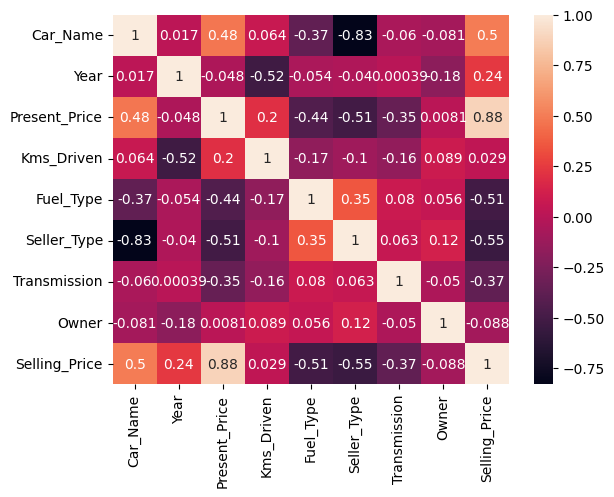

In [24]:
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

/..=> Analyse kare graph ko 

-> jo jitna '1' se pass, wo utna ho co-related

=> Linear Relationship to nahi hai, iska mtlb linear model to nahi lag paega

### Ab hum ek-ek karke sare model lagaenge, taki hume pata chal sake ki Es dataset me kon sa model best rahne wala hai

In [25]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

In [26]:
# Error Check karne ke liye
from sklearn.metrics import mean_squared_error, mean_absolute_error

/..=> Training ke baad hume 2 chij dekhna hai

1. Humare test ki accuracy dekhni hai,
2. eske sath me hume training ki bhi accuracy dekhni hai.

=> Training ki accuracy esliye dekhni hai, kyuki humara Model overfitted ho sakta hai, Overfiiting ke scenario ko rokne/bachne ke liye hum humare model ki accuracy dekhenge training + testing

### Linear Regression

In [27]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train, y_train)*100, lr.score(x_test,y_test)*100


(88.40630578239453, 84.65539666857805)

/..=> Ye Model Overfitted model hai, lekin Model ki accuracy kafi achhi hai

### Lasso

In [28]:
lr1 = Lasso(alpha=10)       # alpha value ko kam karne pe accuracy badhega, overfitting bhi badhega
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train)*100, lr1.score(x_test,y_test)*100

# alpha=10   : (0.0, -0.038173746560565824)
# alpha=5    : (0.0, -0.038173746560565824)
# alpha=1    : (78.03772098983043, 67.64360191823526)
# alpha=0.5  : (85.0124395411389, 78.63348352385346)

(0.0, -0.038173746560565824)

### Ridge

In [29]:
lr2 = Ridge(alpha=5)
lr2.fit(x_train,y_train)
lr2.score(x_train,y_train)*100, lr2.score(x_test,y_test)*100

# alpha=10   : (88.28628537091497, 84.16213595432282)
# alpha=5    : (88.37406606333195, 84.42238212828163)
# alpha=0.5  : (88.4059605465898, 84.6335824859695)

(88.37406606333195, 84.42238212828163)

### ElasticNet

In [30]:
lr3 = ElasticNet(alpha=0.5)
lr3.fit(x_train,y_train)
lr3.score(x_train,y_train)*100, lr3.score(x_test,y_test)*100

# alpha=10  : (0.0, -0.038173746560565824)
# alpha=5   : (21.03625319335991, 16.833618734802513)
# alpha=0.5 : (84.00059239671332, 78.3177718663528)

(84.00059239671332, 78.3177718663528)

### Decision Tree

In [31]:
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

# default       : (100.0, 95.54650534833819)
# max_depth=10  : (99.96109758796794, 96.4390557935978)
# max_depth=4   : (93.63163059242628, 86.69006290651295)



(93.63163059242628, 87.7927332431537)

/..=> Decision tree ne bahut hi achha accuracy diya hai

In [32]:
# (y_true, y_pred)
print(mean_squared_error(y_test , dt.predict(x_test)))
print(mean_absolute_error(y_test , dt.predict(x_test)))


2.8120152513906214
1.1296765452419966


### RandomForest

In [33]:
rf = RandomForestRegressor(n_estimators=40)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100, rf.score(x_test,y_test)*100

# n_estimators= 100 (default) :(98.61748541499963, 95.84465716234688)
# n_estimators= 50  :(98.56138054591575, 95.80573799492996)
# n_estimators= 40  :(98.57769399396227, 96.3033802709017)


(97.88856187573859, 96.42823116038878)

/..=> Without Any Overfitting

In [34]:
# (y_true, y_pred)
print(mean_squared_error(y_test , rf.predict(x_test)))
print(mean_absolute_error(y_test , rf.predict(x_test)))


0.8227778299180329
0.5914754098360662


### SVR

In [35]:
sv = SVR()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100, sv.score(x_test,y_test)*100

(66.00840380338376, 78.48466914602925)

### KNeighborsRegressor

In [36]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)*100, knn.score(x_test,y_test)*100

# n_neighbors=10  : (86.59124637342433, 90.59004346126326)
# n_neighbors=20  : (78.71534799141746, 81.49187905126978)
# n_neighbors=8   : (88.42830479388122, 92.18813390731025)


(88.42830479388122, 92.18813390731025)

In [37]:
# (y_true, y_pred)
print(mean_squared_error(y_test , knn.predict(x_test)))
print(mean_absolute_error(y_test , knn.predict(x_test)))


1.7995090163934426
0.830860655737705


### Conclusion:
Ab hum Jisme (Accuracy Highest + Error Minimum) hai usko select karenge

=> Accuracy Highest : DecisionTree, RandomForest

=> Error Minimum : RandomForest, Decision Tree

==> Jiska Error Minimum wo select : RandomForest

# Model Full Banne ke baad ke steps

ritz	2014	5.59	27000	Petrol	Dealer	Manual	0	3.35


-> Ye Jo data mil rha hai isko as a list ke taur pe rakh lena, prediction ke liye

In [38]:
["ritz", 2014, 5.59, 27000, "Petrol", "Dealer", "Manual", 0 ]

['ritz', 2014, 5.59, 27000, 'Petrol', 'Dealer', 'Manual', 0]

/..=> Ab Es data ko DataFrame me convert karlo

In [39]:
pd.DataFrame([["ritz", 2014, 5.59, 27000, "Petrol", "Dealer", "Manual", 0]], columns= x_train.columns)


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0


/..=> Ye humara predicting data aa gya as a DataFrame ke roop me

Ab Esko store kar lo,

In [40]:
new_data = pd.DataFrame([["ritz", 2014, 5.59, 27000, "Petrol", "Dealer", "Manual", 0]], columns= x_train.columns)

Ab hume Encoding karna hai prediction wale data ka

-> Encoding Dubara se karne ki jarurat nhi hai, pahle jo kiya tha ussi ka use karo

In [41]:
Car_Name_le.transform(new_data["Car_Name"])

array([90])

In [42]:
new_data["Car_Name"] = Car_Name_le.transform(new_data["Car_Name"])
new_data["Fuel_Type"] = Fuel_type_le.transform(new_data["Fuel_Type"])
new_data["Seller_Type"] = Seller_type_le.transform(new_data["Seller_Type"])
new_data["Transmission"] = Transmission_le.transform(new_data["Transmission"])

### Ab Scaling karna hai 

In [43]:
ss.transform(new_data)

array([[ 1.07432341,  0.128897  , -0.23621461, -0.25622446,  0.50018321,
        -0.73728539,  0.39148015, -0.17450057]])

In [44]:
new_data = pd.DataFrame(ss.transform(new_data), columns= new_data.columns)

/..=> Ab bus ES data ko predict function me dalna hai, Aur prediction ready hai

In [45]:
rf.predict(new_data)

array([3.67])